# Data visualization with Python

A picture is worth a thousand words. This is even more true for data analysis, and particularly when the data are large, complex and multi-dimensional. We need to look at our data to make sure that it represents what we think it does and we often need to show our data in order to communicate well with others. 

## The pyviz ecosystem

There are many different ways to visualize data in Python. In fact, there are so many different options that serve every imaginable use-case, that there is a website devoted to helping users sort out what tool to use for what purpose. As an example, the following diagram is taken from that website: 

![](images/pyviz_options.png)


As you can see, the universe of Python visualization divides roughly into a few constellations around some major stars. One of the main decisions that you need to make is whether you need very high performance (in which case, you might want to program in one of the libraries that interact directly with OpenGL, in green in the lower left), whether you are primarily targeting presentation of the visualizations in the browser (in which case, interaction with javascript may be desirable, and you might be in the top left, in red), or whether you would like to rely on Matplotlib (which puts you in the top right, in purple). 

The point is that you will have to consider all of these options and choose something that works well for you. And this might involve some trial and error. 

## Introducing Matplotlib 

Here, we will start with Matplotlib. This may very well end up being your tool of choice for most of your visualizations. There are a few reasons to get started there. The first is that it may very well be the easiest of all of these to teach and to learn. It is also a pretty good choice, becuase it is very popular in the scientific Python ecosystem, and because it is a very well-supported by a large community of developers. 

Matplotlib was started by a neuroscientist, John Hunter, while he was a postdoc at the University of Chicago. Within a few years, together with the rest of the scientific Python ecosystem, Matplotlib took off in popularity, and John left neuroscience to work at a Chicago-based hedge-fund, while still maintaining the library. Having learned about the challenges of software sustainability, he was among the founders of Numfocus, which is a non-profit that serves as the fiscal sponsor for many projects in this ecosystem (enabling them to take contributions, accept grants, and so on). The community around Matplotlib grew and now encompasses more than 1,000 contributors. The library and its visual style became familiar through images such as the images that described the first recording of gravitational waves by the LIGO collaboration: 

![](images/ligo_mpl.png)

Or the famous images of a black hole created by the Event Horizon Telescope team.


![](images/black_hole_mpl.png)

This picture is cool not only because it's a ground-breaking result and it was also made with Matplotlib, seen on that laptop screen, but it also seems to have captured the moment that this result was obtained and the excitement of the researchers (Katie Bouman, at the time at MIT, and now at Caltech, who led the image processing effort that led to this result).

In other words, if you use Matplotlib, you are almost guaranteed to make ground-breaking discoveries! 

## The `pyplot` API

Presenting graphical information is complicated business and Matplotlib is a rather large and complicated library. There are different ways to call functions that would do similar things, depending on the level of detail that you would like to adopt. This makes it a bit hard, because you have to decide at which level you would like to call Matplotlib. However, there is one particular API that is almost always the right choice for a good balance of flexibility and expressivity, and I strongly recommend to always use this API. This is the API that we will learn here. First, we import the sub-module that contains this particular API, `matplolib.pyplot`. You can name it anything you want, but it is a rather strong convention to name it `plt`



In [1]:
import matplotlib.pyplot as plt

The function which will almost always serve as our entry point into this API is the `plt.subplots` function. When called, it returns two objects. The first is always a Matplotlib `Figure` object. If called without any inputs, the second one will always be a Matplotlib `Axes` object.

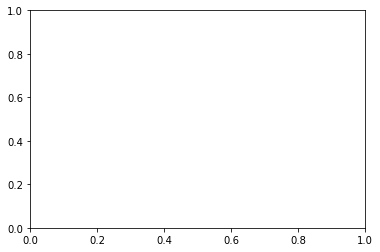

In [2]:
fig, ax = plt.subplots()

The `Figure` is a bit like a page on which the data will be presented. The `Axes` object is the canvas that contains the coordinate frame for data presentation. So, at this point, all we have is the coordinate frame. But the `Axes` object (which we have named `ax` in this example) has methods that can be used to add data into the coordinate frame. So, if we contine within the same cell, we can start adding data to the `Axes`. We'll start by using the `ax.plot` method. The default of this method is to draw a line.  For now, let's keep things really simple, before looking at some real data. 

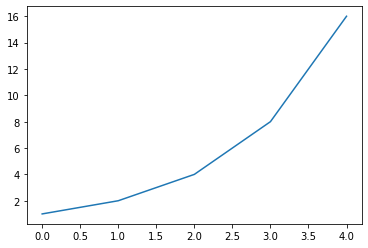

In [3]:
fig, ax = plt.subplots()

ax.plot([1, 2, 4, 8, 16])

If only one sequence is provided, `plot` assumes that this is uniformly sampled and puts the values on y. If two sequences are provided, the first sequence is taken to be the x coordinates, and the second sequence is taken to be the y coordinates

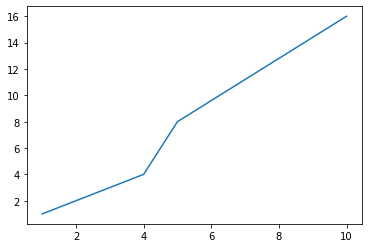

In [4]:
import numpy as np
fig, ax = plt.subplots()
ax.plot(np.array([1, 2, 4, 5, 10]), 
        np.array([1, 2, 4, 8, 16]))

Matplotlib plotting also plays nice with Pandas data structures. For an example, let's look at a neuroscience dataset stored as a tsv file. This is the ABIDEII dataset (if you attended the machine learning tutorial, this dataset should be familiar to you). It contains measurements from more than 1,000 individuals, approximately half of which have been diagnosed with autism. The measurements were processed with Freesurfer, and for every individual, we have surface area, volume, cortical thickness, and local gyrification index in 360 different cortical regions of interest. The data also includes a few variables of phenotypic data such as age, sex and whether they are diagnosed with autism (group=1), or not (group=2).

In [5]:
import pandas as pd

In [6]:
abide = pd.read_csv('/home/jovyan/data/abide2.tsv', sep='\t')

In [7]:
abide.head()

,site,subject,age,age_resid,sex,group,fsArea_L_V1_ROI,fsArea_L_MST_ROI,fsArea_L_V6_ROI,fsArea_L_V2_ROI,...,fsCT_R_p47r_ROI,fsCT_R_TGv_ROI,fsCT_R_MBelt_ROI,fsCT_R_LBelt_ROI,fsCT_R_A4_ROI,fsCT_R_STSva_ROI,fsCT_R_TE1m_ROI,fsCT_R_PI_ROI,fsCT_R_a32pr_ROI,fsCT_R_p24_ROI
0,ABIDEII-KKI_1,29293,8.893151,13.642852,2.0,1.0,2750.0,306.0,354.0,2123.0,...,3.362,2.827,2.777,2.526,3.202,3.024,3.354,2.629,2.699,3.179
1,ABIDEII-OHSU_1,28997,12.000000,16.081732,2.0,1.0,2836.0,186.0,354.0,2261.0,...,2.809,3.539,2.944,2.769,3.530,3.079,3.282,2.670,2.746,3.324
2,ABIDEII-GU_1,28845,8.390000,12.866264,1.0,2.0,3394.0,223.0,373.0,2827.0,...,2.435,3.321,2.799,2.388,3.148,3.125,3.116,2.891,2.940,3.232
3,ABIDEII-NYU_1,29210,8.300000,13.698139,1.0,1.0,3382.0,266.0,422.0,2686.0,...,3.349,3.344,2.694,3.030,3.258,2.774,3.383,2.696,3.014,3.264
4,ABIDEII-EMC_1,29894,7.772758,14.772459,2.0,2.0,3080.0,161.0,346.0,2105.0,...,2.428,2.940,2.809,2.607,3.430,2.752,2.645,3.111,3.219,4.128


Let's visualize the average surface areas of visual cortical areas in the left hemisphere. We can select only these columns using the `filter` method of the `DataFrame` object:

In [8]:
area_visual_l = abide.filter(regex="fsArea_L_V[0-9]")

We extract the mean values in each column using the `mean` method:

In [9]:
mean_area_visual_l = area_visual_l.mean()

The resulting object is a Pandas `Series` object:

In [10]:
mean_area_visual_l

fsArea_L_V1_ROI      3161.415339
fsArea_L_V6_ROI       395.445219
fsArea_L_V2_ROI      2613.914343
fsArea_L_V3_ROI      1747.647410
fsArea_L_V4_ROI      1298.107570
fsArea_L_V8_ROI       262.410359
fsArea_L_V3A_ROI      548.596614
fsArea_L_V7_ROI       191.146414
fsArea_L_V3B_ROI      250.449203
fsArea_L_V6A_ROI      159.583665
fsArea_L_V4t_ROI      183.193227
fsArea_L_V3CD_ROI     294.676295
dtype: float64

Next, we use `ax.plot` passing this series in as input. Matplotlib automatically inserts the values in the index as x tick labels. Because these are long, we will use the `ax.tick_params` method to rotate them 90 degrees, to avoid them colliding with each other.

We will also start using the best practices in annotating our axes with labels, using the `ax.set_xlabel` and `ax.set_ylabel` methods to insert labels: 

Text(0, 0.5, 'Area ($mm^2$)')

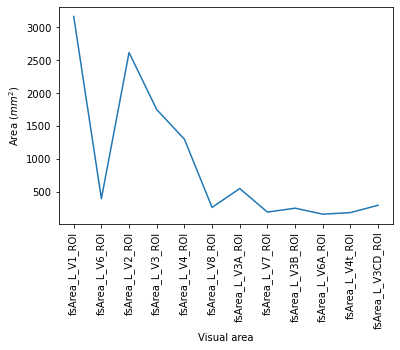

In [11]:
fig, ax = plt.subplots()
ax.plot(mean_area_visual_l)
ax.tick_params(axis='x', labelrotation = 90)
ax.set_xlabel("Visual area")
ax.set_ylabel("Area ($mm^2$)")

Matplotlib accepts the "$" sign as a marker that the enclosed text should be rendered in latex math style. This means that we can do things like use `^` for a superscript, but we can also write more complicated math into these labels if we need to. 

We can plot more than one line into an `Axes` object, by repeating the call to `ax.plot`. For example, let's compare the mean area of the visual areas across the two hemispheres. Notice that we are passing the `values` array to the second call, so that it gets drawn on the same range of x values (try removing that to see what happens otherwise). We are also going to label each line, and add a legend.

In [12]:
area_visual_r = abide.filter(regex="fsArea_R_V[0-9]")
mean_area_visual_r = area_visual_r.mean()

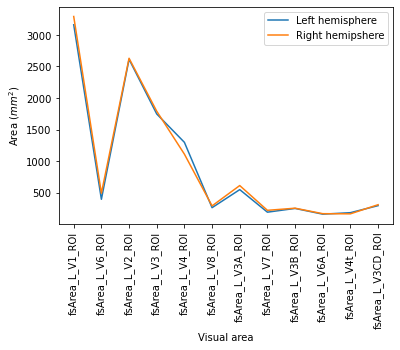

In [13]:
fig, ax = plt.subplots()
ax.plot(mean_area_visual_l, label="Left hemisphere")
ax.plot(mean_area_visual_r.values, label="Right hemipshere")
ax.tick_params(axis='x', labelrotation = 90)
ax.set_xlabel("Visual area")
ax.set_ylabel("Area ($mm^2$)")
ax.legend()

In this case, the continuous line in the plot may give the impression that the data are continuous, and that there is some meaning to the interpolated values between the labeled ticks. It might be a good idea to customize the appearance of the plot, to make it clear that this is not the case. 

We repeat our previous plot, customizing the calls to `ax.plot` with additional key-word arguments that adjust the resulting visualization.

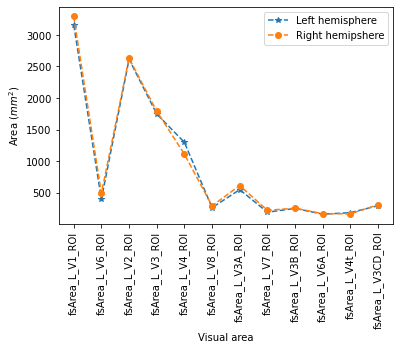

In [14]:
fig, ax = plt.subplots()
ax.plot(mean_area_visual_l, label="Left hemisphere", marker="*", linestyle="--")
ax.plot(mean_area_visual_r.values, label="Right hemipshere", marker="o", linestyle="--")
ax.tick_params(axis='x', labelrotation = 90)
ax.set_xlabel("Visual area")
ax.set_ylabel("Area ($mm^2$)")
ax.legend()

## Scatter plots 

We notice that the mean are of V1 in the right hemisphere seems slightly larger than the mean area of V1 in the left hemisphere. But how consistent is this? We can use a different visualization to compare these values within each individual. A visualization well suited to make such a comparison is a scatter-plot, where each point represents an individual and the two axes represent the two variables to compare. 

Text(0, 0.5, 'Right V1 area ($mm^2$)')

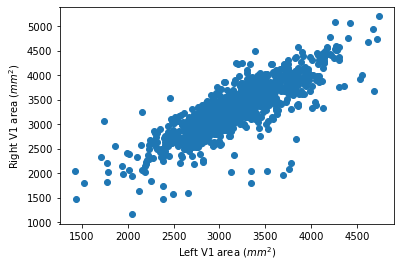

In [15]:
fig, ax = plt.subplots()
ax.scatter(abide["fsArea_L_V1_ROI"], abide["fsArea_R_V1_ROI"])
ax.set_xlabel("Left V1 area ($mm^2$)")
ax.set_ylabel("Right V1 area ($mm^2$)")

It looks like these values are related, but just based on this visualization, it's hard to say whether one value is really larger than the other. For one, the range of values on each axis is different. Second, the aspect ratio of the plot makes it hard to tell if most of the points are higher than the equality (y=x) line. finally, in the middle of the plot, a lot of the points occlude each other, and the points at extreme values get the same weight as the points in the middle of that dense cloud of points. Let's address all of these issue in a revision of this plot. 

1. We will make the points transparent, by setting an alpha channel value when calling `ax.scatter`. This is a value of opacity. When it is smaller than 1.0, this means that the points are made somewhat transparent. This will make the density of the points in different parts of the plot more apparent. 
1. We will add a plot of y=x, so that we can see where most of the data lies.
1. We will set the aspect ratio of the plot, so that the x and y axes take up the same range of values, and also the same amount of space.

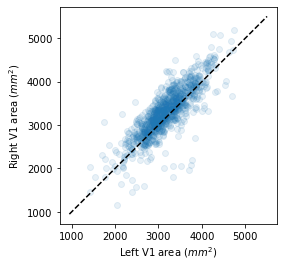

In [16]:
fig, ax = plt.subplots()
ax.scatter(abide["fsArea_L_V1_ROI"], abide["fsArea_R_V1_ROI"], alpha=0.1)
ax.plot([950, 5500], [950, 5500], color="black", linestyle="--")
ax.set_xlabel("Left V1 area ($mm^2$)")
ax.set_ylabel("Right V1 area ($mm^2$)")
ax.set_aspect("equal")

This is not exactly a statistical test, but it does clarify the degree to which this effect is consistent in the data. 

## Small multiples 

One powerful idea in data visualization, that was identified by the great [Edward Tufte](https://www.edwardtufte.com/tufte/), is the notion of "small multiples". The idea is that once we have established a language for a particular kind of visualization, we can reuse this idea again and again to clarify the relationships and/or patterns across a set of similar variables. For example, we have established a good way to compare the area of right V1 to left V1. We can now reuse this visualization to compare other areas across the two hemispheres. To do that, however, we will first expand our use of the subplots function. As we saw above, the function can be called without any input, to provide a single `Axes` and a single `Figure` object. If called with inputs, however, it can instead provide an array of `Axes` objects that all belong to the same `Figure` object. Let's start with empty `Axes`:

<class 'numpy.ndarray'>
(2, 3)


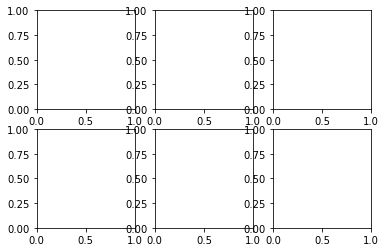

In [17]:
fig, ax = plt.subplots(2,3)
print(type(ax))
print(ax.shape)

This call generates a `Figure` that contains 2 rows and 3 columns of `Axes` objects. These are conveniently stored in a Numpy `array` object that can be used like other numpy arrays. 

Here, we will use this array to iterate over a collection of visual areas, and to display the R-L comparison in each area in its own small multiple. We will add a bit more automation to deal with the difference in scale between the different regions, and also fiddle with the size and layout of the overall figure, to make sure that this looks good.

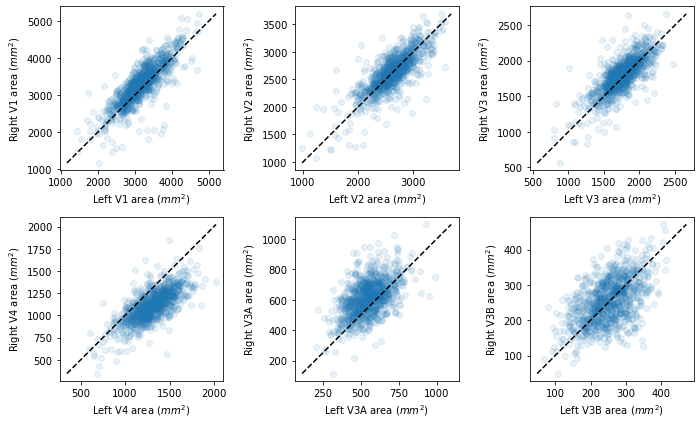

In [18]:
areas = ["V1", "V2", "V3", "V4", "V3A", "V3B"]
fig, axes = plt.subplots(2,3)

ii = 0

for ax in axes.flat:
    roi = areas[ii]
    x = abide[f"fsArea_L_{roi}_ROI"]
    y = abide[f"fsArea_R_{roi}_ROI"]
    ax.scatter(x, y, alpha=0.1)
    smallest = min(x.min(), y.min())
    largest = max(x.max(), y.max())
    ax.plot([smallest, largest], [smallest, largest], color="black", linestyle="--")
    ax.set_xlabel(f"Left {roi} area ($mm^2$)")
    ax.set_ylabel(f"Right {roi} area ($mm^2$)")
    ax.set_aspect("equal")
    ii = ii + 1

fig.set_size_inches([10, 6])
fig.tight_layout()

As you can see, this leads to automated visualizations that can adapt to the data that is provided to them, giving programs that generate visualizations flexibility and robustness.

## Statistical visualizations with Matplotlib

Statistical visualization is all about systematic quantitative comparisons. For example, how meaningful are the differences that we observed between left and right hemisphere V1 area? One of the classical visualizations for this purpose is the Box plot. This plot follows a simple set of conventions to display the median and quantiles (box and red horizontal line), as well as the range of values within 1.5 * IQR from each quartile. Values outside of that are considered outliers.

{'whiskers': [<matplotlib.lines.Line2D at 0x7f96d242de50>,
 'caps': [<matplotlib.lines.Line2D at 0x7f96d242b100>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f96d242dac0>,
 'medians': [<matplotlib.lines.Line2D at 0x7f96d242beb0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f96d2403100>,
 'means': []}

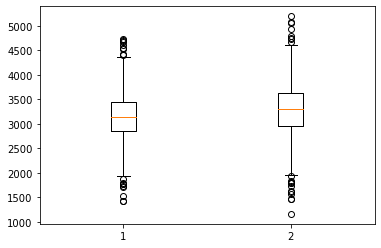

In [27]:
fig, ax = plt.subplots()
ax.boxplot([abide["fsArea_L_V1_ROI"], abide["fsArea_R_V1_ROI"]])

At this point, visualization is used as a rigorous tool for analysis. Rather than just showing us the data, it helps us interpret it and make inferences from it. We will see a bit more of that in a little bit. For now, let's turn to something else. 

## Visualizing images 

So far, we've seen Matplotlib represent numerical data. One more thing that Matplotlib can help us with is to visualize images. For example, image data stored in neuroimaging files. Let's demonstrate that with a nifti file:

In [19]:
import nibabel as nib

In [20]:
img = nib.load("/home/jovyan/data/anatomical.nii.gz")

In [21]:
anatomical = img.get_fdata()

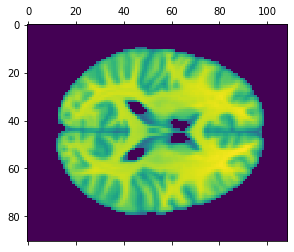

In [22]:
fig, ax = plt.subplots()
ax.matshow(anatomical[:, :, anatomical.shape[-1] // 2])

Notice that the default color-map used by Matplotlib to designate the different intensities in each voxel in this image is called "viridis". It goes from dark blue through shades of green to yellow. One of the merits of this color-map (in stark contrast to many other color-maps that are in widespread use in neuroscience) is that the colors change from low values to high values not only in their hue, but also -- _in a monotonic and linear fashion_ -- from dark to bright. This is important, because it means that the salience of different parts of the image corresponds to how bright they are, which is directly related to the values represented. 

But, you can also choose other colormaps. For example, we are pretty used to looking at MRI images in a gray-scale color-map: 

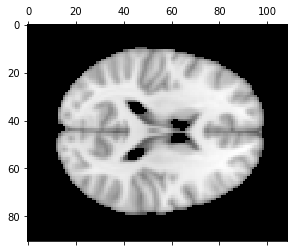

In [23]:
fig, ax = plt.subplots()
ax.matshow(anatomical[:, :, anatomical.shape[-1] // 2], cmap="gray")

## Last thoughts about Matplotlib

Matplotlib is a very large and feature-rich library. We really only touched the tip of the iceberg. The good news is that if you want to learn more, Matplotlib has incredibly good documentation, including an extensive library of examples that you can explore to find the visualization that you would like to create: https://matplotlib.org/stable/gallery/index.html